## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Quick Advice

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

## Business Problem

It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. 



### Step 1: Business Understanding:

This stage is all about gathering facts and requirements. Who will be using the model you build? How will they be using it? How will this help the goals of the business or organization overall? Data Science projects are complex, with many moving parts and stakeholders. They're also time intensive to complete or modify. Because of this, it is very important that the Data Science team working on the project has a deep understanding of what the problem is, and how the solution will be used. Consider the fact that many stakeholders involved in the project may not have technical backgrounds, and may not even be from the same organization. Stakeholders from one part of the organization may have wildly different expectations about the project than stakeholders from a different part of the organization -- for instance, the sales team may be under the impression that a recommendation system project is meant to increase sales by recommending upsells to current customers, while the marketing team may be under the impression that the project is meant to help generate new leads by personalizing product recommendations in a marketing email. These are two very different interpretations of a recommendation system project, and it's understandable that both departments would immediately assume that the primary goal of the project is one that helps their organization. As a Data Scientist, it's up to you clarify the requirements and make sure that everyone involved understands what the project is and isn't.

During this stage, the goal is to get everyone on the same page and to provide clarity on the scope of the project for everyone involved, not just the Data Science team. Generate and answer as many contextual questions as you can about the project.

Good questions for this stage include:

- Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
- What business problem(s) will this Data Science project solve for the organization?
- What problems are inside the scope of this project?
- What problems are outside the scope of this project?
- What data sources are available to us?
- What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
- Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

###   Business Problem:  Provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Step 2: Data Understanding:

Once we have a solid understanding of the business implications for this project, we move on to understanding our data. During this stage, we'll aim to get a solid understanding of the data needed to complete the project. This step includes both understanding where our data is coming from, as well as the information contained within the data.

Consider the following questions when working through this stage:

- What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
- Who controls the data sources, and what steps are needed to get access to the data?
- What is our target?
- What predictors are available to us?
- What data types are the predictors we'll be working with?
- What is the distribution of our data?
- How many observations does our dataset contain? Do we have a lot of data? Only a little?
- Do we have enough data to build a model? Will we need to use resampling methods?
- How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

# Data Exploration

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

data= pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [54]:
## Cannot convert the data type to a float because some of the rows contain a '?'
data['sqft_basement'] = data['sqft_basement'].astype(float)

ValueError: could not convert string to float: '?'

In [55]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [63]:
data.loc[data['sqft_basement'] == "?"]['sqft_basement']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

In [71]:
str(median)

'0.0'

### There are 454 rows that have an unknown value for the sqft_basement
Will be filling the missing values with the features's median. The reason for keeping these values is 
because 


In [73]:
median = data.loc[data['sqft_basement'] != '?']['sqft_basement'].median()
print(median)

0.0


In [75]:
data['sqft_basement'] = data['sqft_basement'].replace('?', median)

In [76]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [78]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
data.nunique() < 30

id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [30]:
#**bedroomsNumber** -  of Bedrooms/House
print(data.bedrooms.unique())
print('This variable is categorical and has about',data.bedrooms.nunique(), 'unique values')

[ 3  2  4  5  1  6  7  8  9 11 10 33]
This variable is categorical and has about 12 unique values


In [28]:
#**bathroomsNumber** -  of bathrooms/bedrooms
print(data.bathrooms.unique())
print('This variable is categorical and has about',data.bathrooms.nunique(), 'unique values')

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
This variable is categorical and has about 29 unique values


In [35]:
#**floorsTotal** -  floors (levels) in house
print(data.floors.unique())
print('This variable is categorical and has about',data.floors.nunique(), 'unique values')

[1.  2.  1.5 3.  2.5 3.5]
This variable is categorical and has about 6 unique values


In [36]:
#**waterfront** - House which has a view to a waterfront
print(data.waterfront.unique())
print('This variable is categorical and has about',data.waterfront.nunique(), 'unique values')

[nan  0.  1.]
This variable is categorical and has about 2 unique values


In [32]:
#**view** - Has been viewed
print(data.view.unique())
print('This variable is categorical and has about',data.view.nunique(), 'unique values')

[ 0. nan  3.  4.  2.  1.]
This variable is categorical and has about 5 unique values


In [33]:
#**condition** - How good the condition is ( Overall )
print(data.condition.unique())
print('This variable is categorical and has about',data.condition.nunique(), 'unique values')

[3 5 4 1 2]
This variable is categorical and has about 5 unique values


In [34]:
#**grade** - overall grade given to the housing unit, based on King County grading system
print(data.grade.unique())
print('This variable is categorical and has about',data.grade.nunique(), 'unique values')

[ 7  6  8 11  9  5 10 12  4  3 13]
This variable is categorical and has about 11 unique values


### Detecting and Dealing with Null Values

In [80]:
data.isna().sum()
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [37]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [38]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

## Questions to ask 

- Should we take out waterfront, and yr_renovated.
- should we just remove just the ones that are NAN 
- can we test our future more on these NAN

In [39]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 430


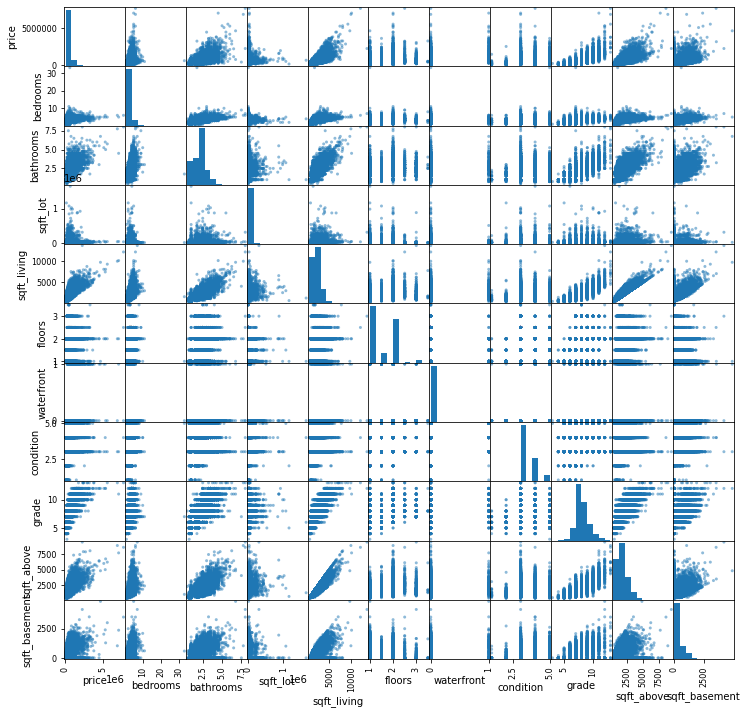

In [81]:
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

# these will be the columns that you will focus your project 
column= ['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living','floors', 'waterfront','condition',
         'grade', 'sqft_above', 'sqft_basement']

data_pred = data[column]
pd.plotting.scatter_matrix(data_pred, figsize = [12,12]);
plt.show()

In [82]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False
sqft_living,False,False,True,False,True,False,False,False,True,True,False
floors,False,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,False,True,False,False,False,True,True,False
sqft_above,False,False,False,False,True,False,False,False,True,True,False


In [83]:
df= data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [84]:
df[(df.cc> .75) & (df.cc< 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758


## Remove sft_living and grade

- Case for removing sqft_living
When evaluating this data you can make the argument that both the numbers of bathrooms and bedrooms can represent sqft_living

- Case for removing grade
When evaluating this data you learn that grade is a metric that was established by the king county grading system. Due to the correlation between both sqft_above and grade it is clear that grade is dependant on sqft_above. For this reason we will keep the influencial variable.

In [85]:
data_pred = data_pred.drop(columns=['sqft_living', 'grade'])
data_pred.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement
0,221900.0,3,1.00,5650,1.0,NaN,3,1180,0.0
1,538000.0,3,2.25,7242,2.0,0.0,3,2170,400.0
2,180000.0,2,1.00,10000,1.0,0.0,3,770,0.0
3,604000.0,4,3.00,5000,1.0,0.0,5,1050,910.0
4,510000.0,3,2.00,8080,1.0,0.0,3,1680,0.0


In [86]:
data_pred.nunique() < 30

price            False
bedrooms          True
bathrooms         True
sqft_lot         False
floors            True
waterfront        True
condition         True
sqft_above       False
sqft_basement    False
dtype: bool

In [ ]:
cont = ['price', 'sqft_lot', 'sqft_above', 'sqft_basement']
categorical = ['bedrooms', 'bathroom', 'floors', 'waterfront', 'condition']

In [90]:
#**waterfront** - House which has a view to a waterfront
print(data.waterfront.unique())
print('This variable is categorical and has about',data.waterfront.nunique(), 'unique values')

[nan  0.  1.]
This variable is categorical and has about 2 unique values


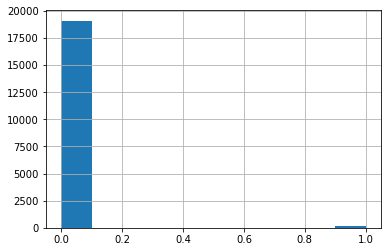

In [94]:
data.waterfront.hist()

## Not including waterfront feature 
- Including the waterfront feature is not approprate in predicting the value of a property. Yes, it might be true that the value might potentially increase but that is a different analysis
    - You would need to find the features that are the same or within a few std